## Homework 6

## <em> MLE, MCMC, Distributional Approximation, Expectation Maximization (EM)</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***

### Imports

In [82]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral' 
plt.rcParams['font.size'] = 22

### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***

#### Problem 1 - Back to Supernova

In this homework, we use a compilation of supernovae data to show that the expansion of the universe is accelerating, and hence it contains dark energy. This is the Nobel prize winning research in 2011 (https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/), and Saul Perlmutter, a professor of physics at Berkeley, shared a prize in 2011 for this discovery.
<br><br>
"The expansion history of the universe can be determined quite easily, using as a “standard candle” any distinguishable class of astronomical objects of known intrinsic brightness that can be identified over a wide distance range. As the light from such beacons travels to Earth through an expanding universe, the cosmic expansion stretches not only the distances between galaxy clusters, but also the very wavelengths of the photons en route. By the time the light reaches us, the spectral wavelength $\lambda$ has thus been redshifted by precisely the same incremental factor $z = \Delta \lambda/\lambda$ by which the cosmos has been stretched in the time interval since the light left its source. The recorded redshift and brightness of each such object thus provide a measurement of the total integrated expansion of the universe since the time the light was emitted. A collection of such measurements, over a sufficient range of distances, would yield an entire historical record of the universe’s expansion." (Saul Perlmutter, http://supernova.lbl.gov/PhysicsTodayArticle.pdf).
<br><br>
Supernovae emerge as extremely promising candidates for measuring the cosmic expansion. Type I Supernovae arises from the collapse of white dwarf stars when the Chandrasekhar limit is reached. Such nuclear chain reaction occurs in the same way and at the same mass, the brightness of these supernovae are always the same. The relationship between the apparent brightness and distance of supernovae depend on the contents and curvature of the universe.
<br><br>
We can infer the "luminosity distance" $D_L$ from measuring the inferred brightness of a supernova of luminosity $L$. Assuming a naive Euclidean approach, if the supernova is observed to have flux $F$, then the area over which the flux is distributed is a sphere radius $D_L$, and hence <br><br>
$$F = \frac{L}{4\pi D_L^2}.$$
<br>
In Big Bang cosmology, $D_L$ is given by:
<br><br>
$$ D_L = \frac{\chi(a)}{a} $$
<br>
where $a$ is the scale factor ($\frac{\lambda_0}{\lambda} = 1 + z = \frac{a_0}{a}$, and the quantity with the subscript 0 means the value at present. Note that $a_0 = 1, z_0 = 0$.), and $\chi$ is the comoving distance, the distance between two objects as would be measured instantaneously today. For a photon, $cdt = a(t)d\chi$, so $\chi(t) = c\int_t^{t_0} \frac{dt'}{a(t')}$. We can write this in terms of a Hubble factor ($H(t) = \frac{1}{a}\frac{da}{dt}$), which tells you the expansion rate: $\chi(a) = c\int_a^1 \frac{da'}{a'^2H(a')} = c\int_0^z \frac{dz'}{H(z')}$. (change of variable using $a = \frac{1}{1+z}$.)
<br><br>
Using the Friedmann equation (which basically solves Einstein's equations for a homogenous and isotropic universe), we can write $H^2$ in terms of the mass density $\rho$ of the components in the universe: $H^2(z) = H_0^2[\Omega_m(1+z)^3 + (1-\Omega_m)(1+z)^2].$ <br><br>
$\Omega$ is the density parameter; it is the ratio of the observed density of matter and energy in the universe ($\rho$) to the critical density $\rho_c$ at which the universe would halt is expansion. So $\Omega_0$ (again, the subscript 0 means the value at the present) is the total mass and energy density of the universe today, and consequently $\Omega_0 = \Omega_{m}$ (matter density parameter today; remember we obtained the best-fit value of this parameter in Project 1?) = $\Omega_{\mathrm{baryonoic\ matter}}$ + $\Omega_{\mathrm{dark\ matter}}$. If $\Omega_0 < 1$, the universe will continue to expand forever. If $\Omega_0 > 1$, the expansion will stop eventually and the universe will start to recollapse. If $\Omega_0 = 1$, then the universe is flat and contains enough matter to halt the expansion but not enough to recollapse it. So it will continue expanding, but gradually slowing down all the time, finally running out of steam only in the infinite future. Even including dark matter in this calculation, cosmologists found that all the matters in the universe only amounts to about a quarter of the required critical mass, suggesting a continuously expanding universe with deceleration. Then, using all this, we can write the luminosity distance in terms of the density parameters: <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.
<br><br>
Fluxes can be expressed in magnitudes $m$, where $m = -2.5\cdot\mathrm{log}_{10}F$ + const. The distance modulus is $\mu = m - M$ ($M$ is the absolute magnitude, the value of $m$ if the supernova is at a distance 10pc. Then, we have:
<br><br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}\Big(D_L\ [in\ the\ unit\ of \ Mpc]\Big)$$
<br><br>
In this assignment, we use the SCP Union2.1 Supernova (SN) Ia compilation. (http://supernova.lbl.gov/union/)
<br><br>
First, load the measured data: $z$ (redshift), $\mu$ (distance modulus), $\sigma(\mu)$ (error on distance modulus)


In [148]:
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW6/sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

***

In Project1-part2, with measurements of the distance modulus $\mu$, we used Bayesian analysis to estimate the cosmological parameters $w$ and $\Omega_m$.
<br><br>
Let us assume that the universe is flat (which is a fair assumption since the CMB measurements indicate that the universe has no large-scale curvature). $\Omega_0 = \Omega_m + \Omega_{DE} = 1$. Then, we do not need to worry about the curvature term:<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.<br><br>
Assuming that errors are Gaussian (can be justified by averaging over large numbers of SN; central limit theorem), we calculate the likelihood $L$ as: <br><br>
$$ L \propto \mathrm{exp}\Big( -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) $$
<br>
where $z_i, \mu_i, \sigma(\mu_i)$ are from the measurements, and we compute $\mu_{model}$ as a function of $z, \Omega_m, w$.

<br><br>
First, try the <b>maximum likelihood estimation (MLE)</b>. 
<br><br>

<span style="color:blue"> <i> 1. Assuming that $h$ = 0.7, find the maximum likelihood estimation of $\Omega_m$ and $w$ (i.e. find $\Omega_m$ and $w$ which maximizes the likelihood. 
</i></span><br><br>
(Hint: This is very similar to HW5 problem. Take the log of the likelihood and maximize it using scipy.optimize.fmin (https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.fmin.html). Note that you need to make initial guesses on the parameters in order to use fmin. You can set them to be 0. Caveat: "fmin" minimizes a given function, so you should multiply the log-likelihood by $-1$ in order to maximize it using fmin.)
<br>


In [149]:
def calc_mu_model(z_data,omega_m, w):
  def integrand(z_prime):
    #helper function
    return 1/np.sqrt(omega_m * (1 + z_prime)**3 + (1 - omega_m)*(1 + z_prime)**(3*(1+w)))
  h=0.7
  mu = np.zeros((len(z_data)))
  for i in range(len(z_data)):
    z = z_data[i]
    A = (2997.92458 * (1 + z))/h #prefactor
    mu[i] = 25 + 5 * np.log10(A * quad(integrand, 0, z)[0]) #return mu
  return mu


In [150]:
from scipy import optimize

def minus_log_likelihood(param):
    
    Omegam, w = param
    
    if(Omegam<=0 or w>=0):
        lnL = -1.e100
    else:
        mu_model = calc_mu_model(z_data, Omegam, w)
        delta_mu = mu_data - mu_model
        lnL = -np.sum(delta_mu**2 / mu_err_data**2) / 2

    return -lnL

In [151]:
guesses = np.array([0, 0])
Omegam, w = optimize.fmin(minus_log_likelihood, guesses)
print('MAP solution')
print('Omega_m = ', Omegam, ', w = ', w)

Optimization terminated successfully.
         Current function value: 281.112865
         Iterations: 63
         Function evaluations: 124
MAP solution
Omega_m =  0.2796236523092833 , w =  -1.0044614428682217


***

Now, use emcee package (reference: Problem 2 and 3 in HW5) to get the full posteriors of $w$ and $\Omega_m$.

<span style="color:blue"> 2. (1) Run few parallel sequences of Metropolis algorithm simulations using the package "emcee". (2) Print your constraints on $w$ and $\Omega_m$. (3) Plot 1-d posterior of $w$ and $\Omega_m$ as well as 2-d posterior using the package "corner" (reference: Problem 2 in HW5). Make sure that your chains have converged. 
</span>

Hint: You may want to start with a small number of "nsteps" for debugging. 

"Walkers" are the members of the ensemble. They are almost like separate Metropolis-Hastings chains but, of course, the proposal distribution for a given walker depends on the positions of all the other walkers in the ensemble. (https://emcee.readthedocs.io/en/stable/user/faq/?highlight=walker#what-are-walkers) It is recommended that nwalkers > 2 $\cdot$ number of parameters.

In [88]:
!pip install emcee

     |████████████████████████████████| 45 kB 2.0 MB/s 


In [89]:
import emcee

In [152]:
def log_prior(param, data0, data1, data2):
    z_data, mu_data, mu_err_data = data0, data1, data2
    Omegam, w = param
    if Omegam > 0 and w < 0:
        return 0.0
    return -np.inf

def log_likelihood(param, data0, data1, data2):
    z_data, mu_data, mu_err_data = data0, data1, data2
    Omegam, w = param
    
    if(Omegam<=0 or w>=0):
        lnL = -1.e100
    else:
        mu_model = calc_mu_model(z_data, Omegam, w)
        delta_mu = mu_data - mu_model
        lnL = -np.sum(delta_mu**2 / mu_err_data**2) / 2

    return lnL

def log_posterior(param, data0, data1, data2):
    lp = log_prior(param, data0, data1, data2)
    return lp + log_likelihood(param, data0, data1, data2)

In [153]:
import time

emcee_trace = []

start = time.time()
for i in range(2):
    # Here we'll set up the computation. emcee combines multiple "walkers",
    # each of which is its own MCMC chain. The number of trace results will
    # be nwalkers * nsteps
    start_i = time.time()
    ndim = 2  # number of parameters in the model
    nwalkers = 10  # number of MCMC walkers
    nburn = 500 # "burn-in" period to let chains stabilize
    nsteps = 1000  # number of MCMC steps to take

    # set theta near the maximum likelihood, with 
    np.random.seed(0)
    starting_guesses = np.random.random((nwalkers, ndim))
    starting_guesses[:,1] *= -1
    # Here's the function call where all the work happens:
    # we'll time it using IPython's %time magic

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[z_data,mu_data, mu_err_data])
    sampler.run_mcmc(starting_guesses, nsteps)

    emcee_trace.append(sampler.chain[:, nburn:, :].reshape(-1, ndim).T)
    finish_i = time.time()
    print("MCMC chain " + str(i)+ " took {0:0.3f} seconds".format(finish_i - start_i))

emcee_trace = np.array(emcee_trace)
finish = time.time()
print("Emcee took {0:0.3f} seconds".format(finish - start))
    
    

MCMC chain 0 took 521.279 seconds
MCMC chain 1 took 533.810 seconds
Emcee took 1055.090 seconds


In [154]:
print(np.shape(emcee_trace))

(2, 2, 5000)


In [155]:
print('MCMC result:')
print('Omega_m = ',np.mean(emcee_trace[:,0,:]) , '+/-' , np.std(emcee_trace[:,0,:]))
print('w = ', np.mean(emcee_trace[:,1,:]), '+/-' , np.std(emcee_trace[:,1,:]))


MCMC result:
Omega_m =  0.27945574006824064 +/- 0.06180953228851594
w =  -1.0192318196515808 +/- 0.14411628762387335


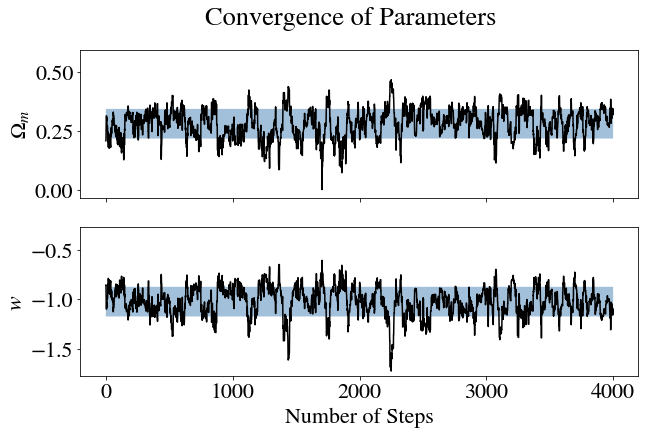

In [156]:
theta_ = np.mean(emcee_trace[:,:,nburn:], axis=0)
theta_err = np.std(emcee_trace[:,:,nburn:], axis=0)

f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))
f.suptitle("Convergence of Parameters")

ax1.plot(theta_[0,nburn:], color='black')
ax1.fill_between(range(len(theta_[0,nburn:])), 
                       y1= np.mean(theta_[0,nburn:]) + np.std(theta_[0,nburn:]), 
                       y2 = np.mean(theta_[0,nburn:]) - np.std(theta_[0,nburn:]), alpha=0.5, facecolor='steelblue')

ax1.set_ylim(np.mean(theta_[0,nburn:]) - 5*np.std(theta_[0,nburn:]),np.mean(theta_[0,nburn:]) + 5*np.std(theta_[0,nburn:]))


ax2.plot(theta_[1,nburn:], color='black')
ax2.fill_between(range(len(theta_[1,nburn:])), 
                       y1= np.mean(theta_[1,nburn:]) + np.std(theta_[1,nburn:]), 
                       y2 = np.mean(theta_[1,nburn:]) - np.std(theta_[1,nburn:]), alpha=0.5, facecolor='steelblue')

ax2.set_ylim(np.mean(theta_[1,nburn:]) - 5*np.std(theta_[1,nburn:]),np.mean(theta_[1,nburn:]) + 5*np.std(theta_[1,nburn:]))

ax1.set_ylabel("$\\Omega_m$")
ax2.set_ylabel("$w$")
ax2.set_xlabel("Number of Steps")


plt.show()

In [ ]:
!pip install corner

In [157]:
import corner

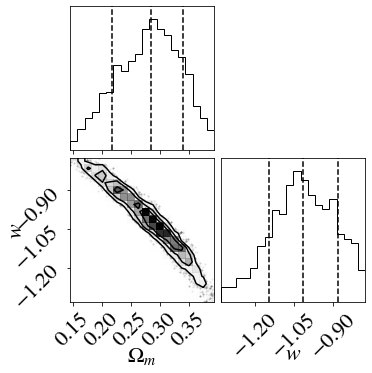

In [158]:
fig = corner.corner(emcee_trace[0, :, :].T, labels=["$\\Omega_m$", "$w$"], quantiles=[0.16, 0.5, 0.84], range = 0.95*np.ones(2))


<br><br>
Now, include the distance modulus of 12 additional supernovae, which are not-so-good standard candles. They are 3$\sigma$ away from the best-fit mode. 

In [159]:
# with outliers included
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW6/sn_z_mu_dmu_plow_union2.1_outlier.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

So we have a total of 592 supernovae, and we can see that the last 12 supernovae seem to be outliers. (i.e. mu_data[580:] contains the distance modulus measurements of these 12 supernovae.)
<br><br>
<span style="color:blue"> <i> 3. Plot the measurements of all 592 supernovae (with errorbar). Show the last 12 supernovae (outliers) with a different color. </i></span><br>

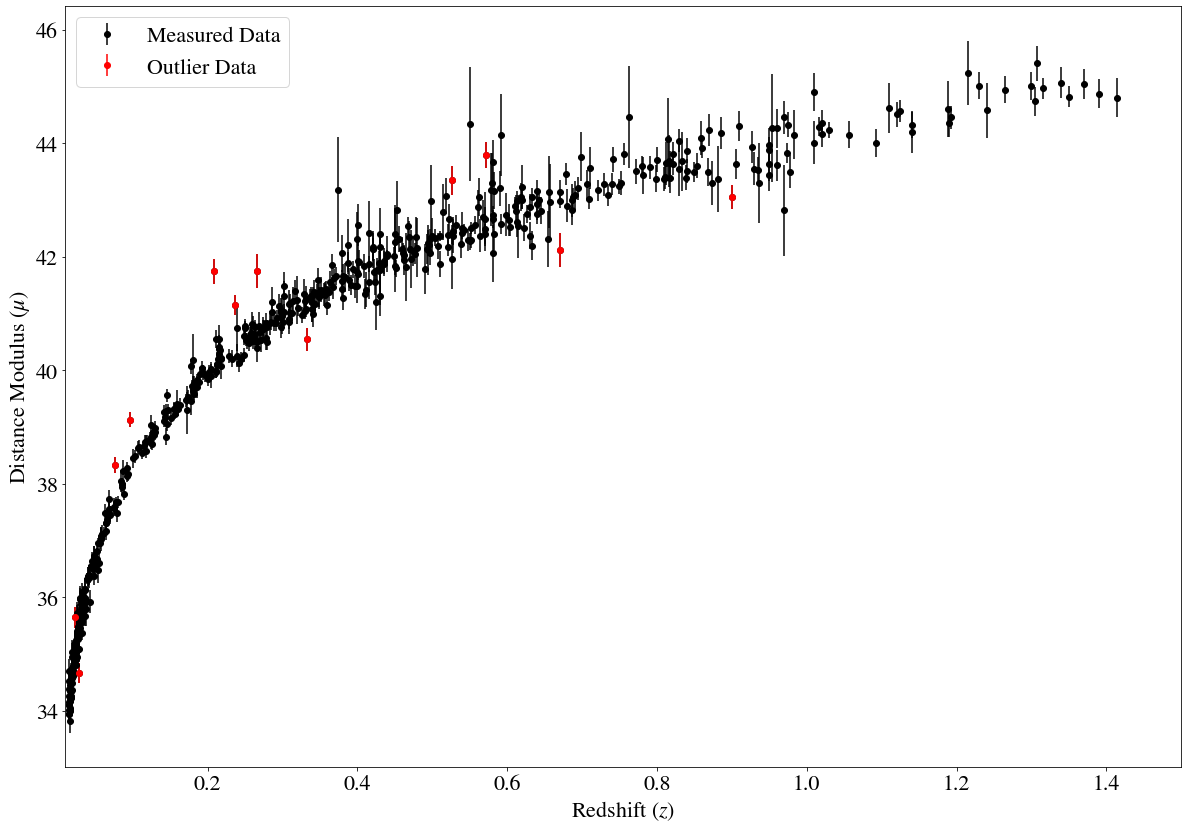

In [160]:

plt.figure(figsize = (20,14))
plt.errorbar(z_data, mu_data, yerr=mu_err_data, color='black', fmt='o', label='Measured Data')
plt.errorbar(z_data[580:], mu_data[580:], yerr=mu_err_data[580:], color='red', fmt='o', label='Outlier Data')
plt.legend(fontsize=22)
plt.xlim(0.01, 1.5)
plt.xlabel('Redshift ($z$)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.show()


<span style="color:blue"> 4. With 12 outliers included, run few parallel sequences of Metropolis algorithm simulations using the package "emcee". Print your constraints on $w$ and $\Omega_m$ and plot 1-d posterior of $w$ and $\Omega_m$ as well as 2-d posterior using the package "corner". Make sure that your chains have converged. 
</span>

In [161]:
def log_prior(param, data0, data1, data2):
    z_data, mu_data, mu_err_data = data0, data1, data2
    Omegam, w = param
    if Omegam > 0 and w < 0:
        return 0.0
    return -np.inf

def log_likelihood(param, data0, data1, data2):
    z_data, mu_data, mu_err_data = data0, data1, data2
    Omegam, w = param
    
    if(Omegam<=0 or w>=0):
        lnL = -1.e100
    else:
        mu_model = calc_mu_model(z_data, Omegam, w)
        delta_mu = mu_data - mu_model
        lnL = -np.sum(delta_mu**2 / mu_err_data**2) / 2

    return lnL

def log_posterior(param, data0, data1, data2):
    lp = log_prior(param, data0, data1, data2)
    return lp + log_likelihood(param, data0, data1, data2)

In [163]:
import time

emcee_trace = []

start = time.time()
for i in range(2):
    # Here we'll set up the computation. emcee combines multiple "walkers",
    # each of which is its own MCMC chain. The number of trace results will
    # be nwalkers * nsteps
    start_i = time.time()
    ndim = 2  # number of parameters in the model
    nwalkers = 10  # number of MCMC walkers
    nburn = 500 # "burn-in" period to let chains stabilize
    nsteps = 1000  # number of MCMC steps to take

    # set theta near the maximum likelihood, with 
    np.random.seed(0)
    starting_guesses = np.random.random((nwalkers, ndim))
    starting_guesses[:,1] *= -1
    # Here's the function call where all the work happens:
    # we'll time it using IPython's %time magic

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[z_data,mu_data, mu_err_data])
    sampler.run_mcmc(starting_guesses, nsteps)

    emcee_trace.append(sampler.chain[:, nburn:, :].reshape(-1, ndim).T)
    finish_i = time.time()
    print("MCMC chain " + str(i)+ " took {0:0.3f} seconds".format(finish_i - start_i))

emcee_trace = np.array(emcee_trace)
finish = time.time()
print("Emcee took {0:0.3f} seconds".format(finish - start))
    
    

MCMC chain 0 took 554.138 seconds
MCMC chain 1 took 515.627 seconds
Emcee took 1069.767 seconds


In [164]:
emcee_trace_naive = emcee_trace

omega_naive_bestfit = np.array([np.mean(emcee_trace_naive[:,0,:]), np.std(emcee_trace_naive[:,0,:])])
w_naive_bestfit = np.array([np.mean(emcee_trace_naive[:,1,:]), np.std(emcee_trace_naive[:,1,:])])

print('(outliers included) MCMC result - naive model:')
print('Omega_m = ', omega_naive_bestfit[0], '+/-' , omega_naive_bestfit[1])
print('w = ', w_naive_bestfit[0], '+/-' , w_naive_bestfit[1])

(outliers included) MCMC result - naive model:
Omega_m =  0.3384977380304381 +/- 0.053362829921276306
w =  -1.196244538277689 +/- 0.16227524048433722


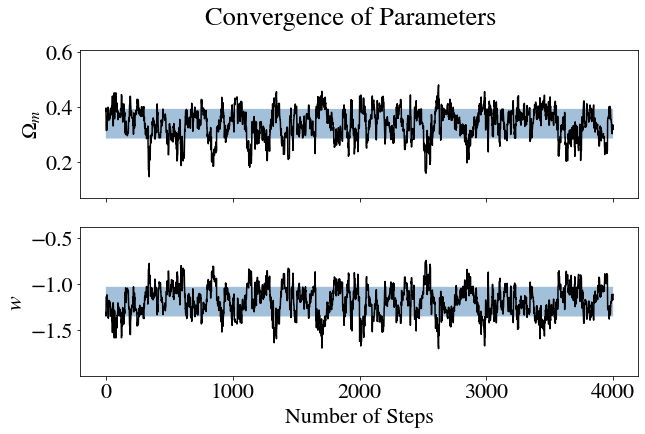

In [165]:
theta_naive = np.mean(emcee_trace_naive[:,:,nburn:], axis=0)
theta_naive_err = np.std(emcee_trace_naive[:,:,nburn:], axis=0)

f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))
f.suptitle("Convergence of Parameters")

ax1.plot(theta_naive[0,nburn:], color='black')
ax1.fill_between(range(len(theta_naive[0,nburn:])), 
                       y1= np.mean(theta_naive[0,nburn:]) + np.std(theta_naive[0,nburn:]), 
                       y2 = np.mean(theta_naive[0,nburn:]) - np.std(theta_naive[0,nburn:]), alpha=0.5, facecolor='steelblue')

ax1.set_ylim(np.mean(theta_naive[0,nburn:]) - 5*np.std(theta_naive[0,nburn:]),np.mean(theta_naive[0,nburn:]) + 5*np.std(theta_naive[0,nburn:]))


ax2.plot(theta_naive[1,nburn:], color='black')
ax2.fill_between(range(len(theta_naive[1,nburn:])), 
                       y1= np.mean(theta_naive[1,nburn:]) + np.std(theta_naive[1,nburn:]), 
                       y2 = np.mean(theta_naive[1,nburn:]) - np.std(theta_naive[1,nburn:]), alpha=0.5, facecolor='steelblue')

ax2.set_ylim(np.mean(theta_naive[1,nburn:]) - 5*np.std(theta_naive[1,nburn:]),np.mean(theta_naive[1,nburn:]) + 5*np.std(theta_naive[1,nburn:]))

ax1.set_ylabel("$\\Omega_m$")
ax2.set_ylabel("$w$")
ax2.set_xlabel("Number of Steps")


plt.show()

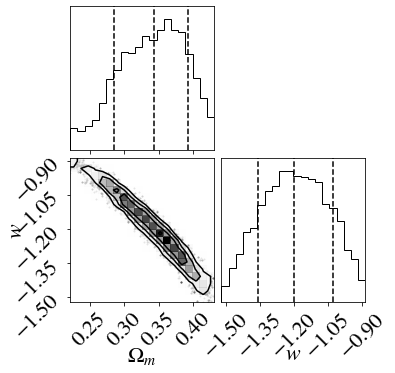

In [166]:
fig = corner.corner(emcee_trace_naive[0, :, :].T, labels=["$\\Omega_m$", "$w$"], quantiles=[0.16, 0.5, 0.84], range = 0.95*np.ones(2))

<br><br>
Remember that in HW5, we used the Gaussian mixture to better model the measurements with outliers. Let us apply the same technique in this case.
<br><br>
$$ L = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \frac{g}{\sqrt{2\pi\sigma(\mu_i)^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) + \frac{1-g}{\sqrt{2\pi\sigma_B^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w) + \Delta \mu]^2}{\sigma_B^2} \Big) \Big] $$
<br>
Here, we have 5 free parameters: $\Omega_m, w, g, \sigma_B, \Delta \mu$.
<br><br>
With outliers, we think there is something in the noise we do not really understand, which makes error distribution non-Gaussian. So we hope adding a second Gaussian to the model would better describe the pdf. $g$ determines weights on the two Gaussians. $\sigma_B^2$ is the variance of the second Gaussian, which we assume to be larger than the variance of the first Gaussian. $\Delta \mu$ is the distance modulus offset in the second Gaussian.
<br><br>

<span style="color:blue"> <i> 5. Using emcee, run few parallel sequences of Metropolis algorithm simulations with this new model. Print your constraints on $w$ and $\Omega_m$ and plot 1-d posterior of $w$ and $\Omega_m$ as well as 2-d posterior using the package "corner". Make sure that your chains have converged.  </i></span><br>

In [167]:
def log_prior(theta):
    Omegam, w = theta[0], theta[1]
    #g_i needs to be between 0 and 1
    if theta[2] > 0 and theta[2] < 1:
        return 0.0

    if Omegam > 0 and w < 0:
        return 0.0
    
    return -np.inf

def calc_mu_model(z_data,omega_m, w):
  def integrand(z_prime):
    #helper function
    return 1/np.sqrt(omega_m * (1 + z_prime)**3 + (1 - omega_m)*(1 + z_prime)**(3*(1+w)))
  h=0.7

  z = z_data
  A = (2997.92458 * (1 + z))/h #prefactor
  mu = 25 + 5 * np.log10(A * quad(integrand, 0, z)[0]) #return mu
  return mu


def log_likelihood(theta, x, y, e):
    g = theta[2]
    sigma_B = theta[3]
    dmu = theta[4]
    val_total = 0
    for i in range(len(x)):
      val1 = (g/(np.sqrt(2*np.pi * e[i]**2))) * np.exp(-(calc_mu_model(x[i],theta[0],theta[1]) - y[i])**2 / (2*e[i]**2))
      val2 = ((1 - g)/(np.sqrt(2*np.pi * sigma_B**2))) * np.exp(-(y[i] - calc_mu_model(x[i],theta[0],theta[1]) + dmu)**2 / (2*sigma_B**2))
      val_total += np.log(val1 + val2)

    return val_total

def log_posterior(theta, x, y, e):
    lp = log_prior(theta)
    ll = log_likelihood(theta, x, y, e)

    if not np.isfinite(lp) or not np.isfinite(ll):
        return -np.inf

    return lp + ll

In [168]:
emcee_trace = []

start = time.time()
for i in range(2):
    # Here we'll set up the computation. emcee combines multiple "walkers",
    # each of which is its own MCMC chain. The number of trace results will
    # be nwalkers * nsteps
    start_i = time.time()
    ndim = 5  # number of parameters in the model
    nwalkers = 15  # number of MCMC walkers
    nburn = 500 # "burn-in" period to let chains stabilize
    nsteps = 1000  # number of MCMC steps to take

    # set theta near the maximum likelihood, with 
    np.random.seed(0)
    starting_guesses = np.random.random((nwalkers, ndim))
    starting_guesses[:,1] *= -1
    # Here's the function call where all the work happens:
    # we'll time it using IPython's %time magic

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[z_data,mu_data, mu_err_data])
    sampler.run_mcmc(starting_guesses, nsteps)

    emcee_trace.append(sampler.chain[:, nburn:, :].reshape(-1, ndim).T)
    finish_i = time.time()
    print("MCMC chain " + str(i)+ " took {0:0.3f} seconds".format(finish_i - start_i))

emcee_trace = np.array(emcee_trace)
finish = time.time()
print("Emcee took {0:0.3f} seconds".format(finish - start))
    
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


MCMC chain 0 took 1735.565 seconds
MCMC chain 1 took 1778.960 seconds
Emcee took 3514.528 seconds


In [169]:
print('(outliers included) MCMC result - Gaussian mixture model:')
emcee_trace_GM = emcee_trace

omega_GM_bestfit = np.array([np.mean(emcee_trace_GM[:,0,:]), np.std(emcee_trace_GM[:,0,:])])
w_GM_bestfit = np.array([np.mean(emcee_trace_GM[:,1,:]), np.std(emcee_trace_GM[:,1,:])])
print('Omega_m = ', omega_GM_bestfit[0], '+/-' , omega_GM_bestfit[1])
print('w = ', w_GM_bestfit[0], '+/-' , w_GM_bestfit[1])

(outliers included) MCMC result - Gaussian mixture model:
Omega_m =  0.2792350665566308 +/- 0.06416122781803148
w =  -1.0024965962132648 +/- 0.1459387381515779


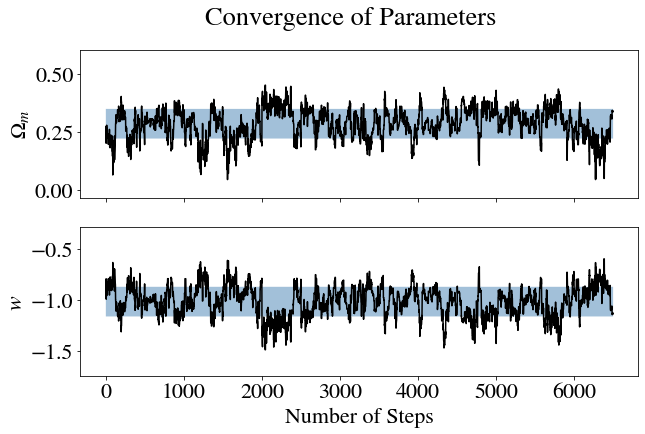

In [170]:
theta_GM = np.mean(emcee_trace_GM[:,:,nburn:], axis=0)
theta_GM_err = np.std(emcee_trace_GM[:,:,nburn:], axis=0)

f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))
f.suptitle("Convergence of Parameters")

ax1.plot(theta_GM[0,nburn:], color='black')
ax1.fill_between(range(len(theta_GM[0,nburn:])), 
                       y1= np.mean(theta_GM[0,nburn:]) + np.std(theta_GM[0,nburn:]), 
                       y2 = np.mean(theta_GM[0,nburn:]) - np.std(theta_GM[0,nburn:]), alpha=0.5, facecolor='steelblue')

ax1.set_ylim(np.mean(theta_GM[0,nburn:]) - 5*np.std(theta_GM[0,nburn:]),np.mean(theta_GM[0,nburn:]) + 5*np.std(theta_GM[0,nburn:]))


ax2.plot(theta_GM[1,nburn:], color='black')
ax2.fill_between(range(len(theta_GM[1,nburn:])), 
                       y1= np.mean(theta_GM[1,nburn:]) + np.std(theta_GM[1,nburn:]), 
                       y2 = np.mean(theta_GM[1,nburn:]) - np.std(theta_GM[1,nburn:]), alpha=0.5, facecolor='steelblue')

ax2.set_ylim(np.mean(theta_GM[1,nburn:]) - 5*np.std(theta_GM[1,nburn:]),np.mean(theta_GM[1,nburn:]) + 5*np.std(theta_GM[1,nburn:]))

ax1.set_ylabel("$\\Omega_m$")
ax2.set_ylabel("$w$")
ax2.set_xlabel("Number of Steps")


plt.show()

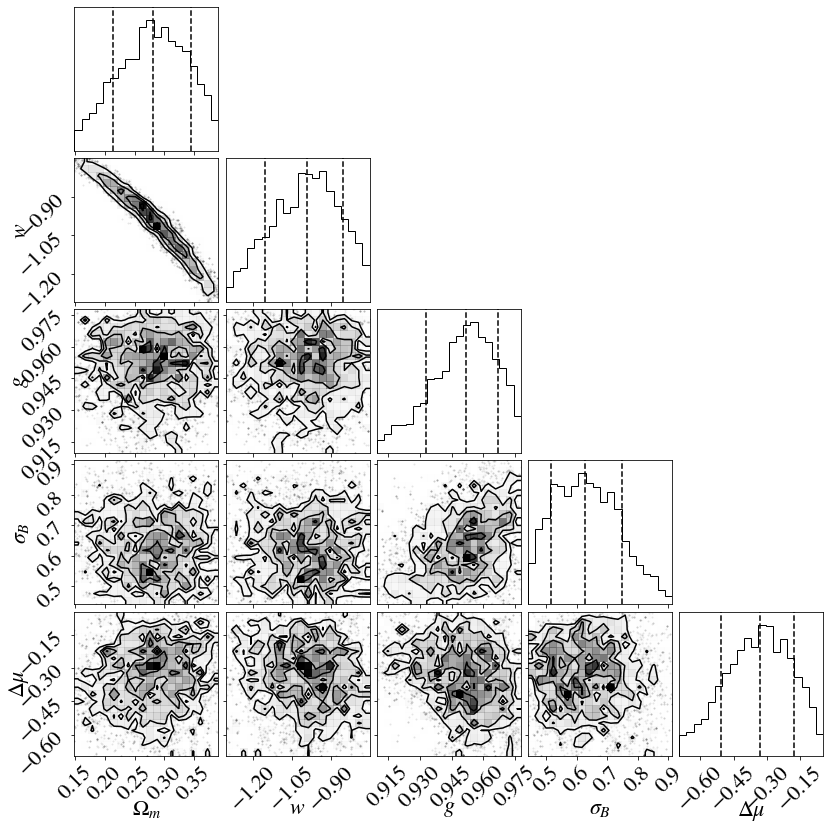

In [171]:
fig = corner.corner(emcee_trace_GM[0, :, :].T, labels=["$\\Omega_m$", "$w$", "$g$", "$\\sigma_B$", "$\\Delta \mu$"], 
                    quantiles=[0.16, 0.5, 0.84], range = 0.95*np.ones(5))

<span style="color:blue"> <i> 6. Using the estimates of $\Omega_m$ and $w$ from your MCMC chain in Part 4 an Part 5, calculate the distance modulus from theory and plot the curves on top of the measured data. See how they fit. </i></span><br>

In [172]:
z_lin = np.linspace(np.min(z_data), np.max(z_data), 1000)

def calc_mu_model_full(z_data,omega_m, w):
  def integrand(z_prime):
    #helper function
    return 1/np.sqrt(omega_m * (1 + z_prime)**3 + (1 - omega_m)*(1 + z_prime)**(3*(1+w)))
  h=0.7
  mu = np.zeros((len(z_data)))
  for i in range(len(z_data)):
    z = z_data[i]
    A = (2997.92458 * (1 + z))/h #prefactor
    mu[i] = 25 + 5 * np.log10(A * quad(integrand, 0, z)[0]) #return mu
  return mu

mu_GM = calc_mu_model_full(z_lin, omega_GM_bestfit[0], w_GM_bestfit[0])
mu_naive = calc_mu_model_full(z_lin, omega_naive_bestfit[0], w_naive_bestfit[0])


In [173]:

print("Omega_m with GM =",omega_GM_bestfit[0],'+/-', omega_GM_bestfit[1])
print("Omega_m with naive model =",omega_naive_bestfit[0],'+/-', omega_naive_bestfit[1])

print('\n')

print("w with GM =",w_GM_bestfit[0],'+/-', w_GM_bestfit[1])
print("w with naive model =",w_naive_bestfit[0],'+/-', w_naive_bestfit[1])

Omega_m with GM = 0.2792350665566308 +/- 0.06416122781803148
Omega_m with naive model = 0.3384977380304381 +/- 0.053362829921276306


w with GM = -1.0024965962132648 +/- 0.1459387381515779
w with naive model = -1.196244538277689 +/- 0.16227524048433722


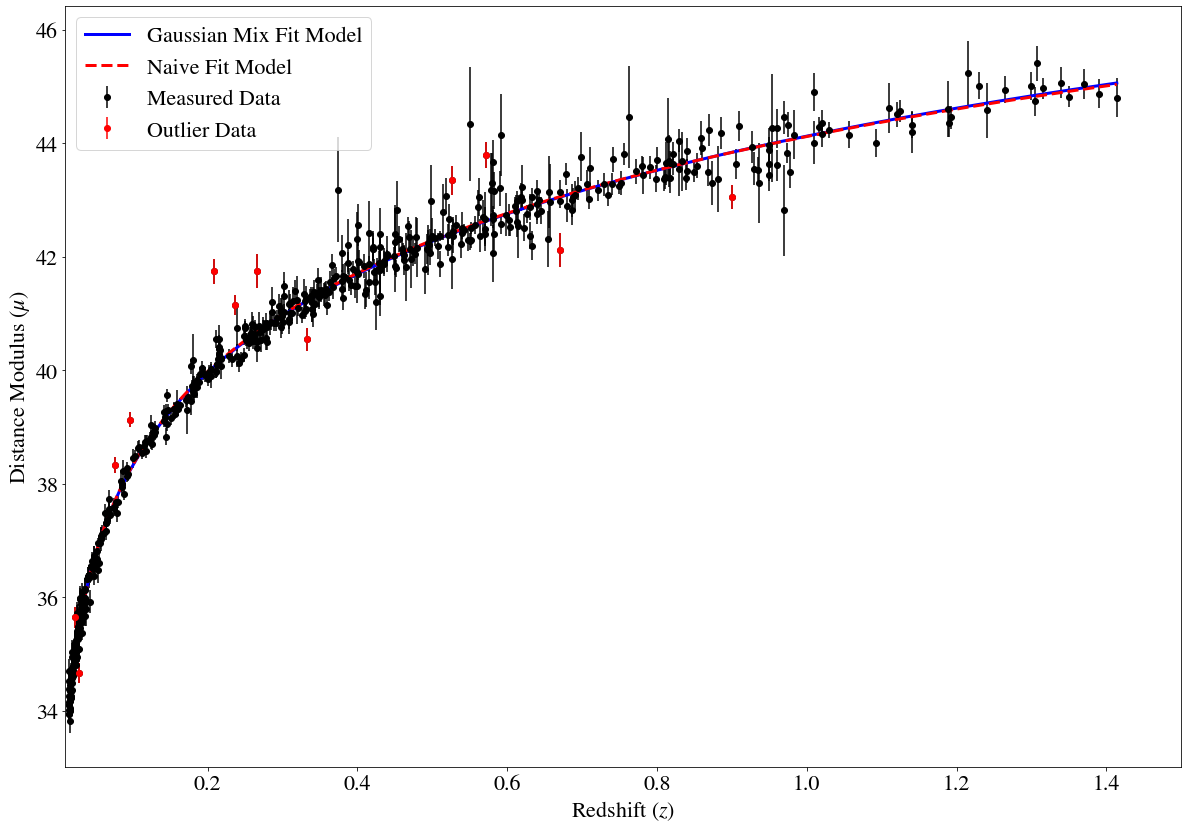

In [174]:
plt.figure(figsize = (20,14))


plt.errorbar(z_data, mu_data, yerr=mu_err_data, color='black', fmt='o', label='Measured Data')
plt.errorbar(z_data[580:], mu_data[580:], yerr=mu_err_data[580:], color='red', fmt='o', label='Outlier Data')
plt.plot(z_lin, mu_GM, color='blue',linewidth=3,label="Gaussian Mix Fit Model")
plt.plot(z_lin, mu_naive, color='red',linestyle='--',linewidth=3,label="Naive Fit Model")
plt.legend(fontsize=22)
plt.xlim(0.01, 1.5)
plt.xlabel('Redshift ($z$)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

***

Reference: See pg. 8-16 (https://lear.inrialpes.fr/~jegou/bishopreadinggroup/chap9.pdf)
<br><br>
For this Gaussian mixture model, we wish to maximize the likelihood function with respect to the parameters $g, \sigma_B, \Delta \mu$ for $\Omega_m = 0.3, w = -1$. In order to do this, we will apply the <b>expectation-maximization (EM)</b> algorithm. This is an iterative method to find maximum likelihood in the case where the model depends on the hidden/latent variable. Here, we call binary variable <b>a</b> as our latent variable such that $p(a_k = 1) = \pi_k$
<br><br>
Re-write the likelihood as:
<br>
$$ L = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \frac{\pi_1}{\sqrt{2\pi\sigma(\mu_i)^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m = 0.3, w = -1)]^2}{\sigma(\mu_i)^2} \Big) + \frac{\pi_2}{\sqrt{2\pi\sigma_B^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m = 0.3, w = -1) - \mu_{\mathrm{offset}}]^2}{\sigma_B^2} \Big) \Big] $$
<br>
$$ = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \pi_1  \cdot \mathrm{Normal}\big(\Delta \mu_i = \mu_{i,\ data}-\mu_{i,\ model}\big|\ \overline{\Delta \mu}_{\mathrm{class\ 1}} = 0, \sigma(\mu_i)^2 \big) + \pi_2 \cdot \mathrm{Normal}\big(\Delta \mu_i = \mu_{i,\ data}-\mu_{i,\ model}\big|\ \overline{\Delta \mu}_{\mathrm{class\ 2}} = \mu_{\mathrm{offset}}, \sigma_B^2 \big) \Big] $$
where $\mu_{i,\ model}$ assumes $\Omega_m = 0.3, w = -1$. Suppose that we measure $\Delta \mu = \mu_{i,\ data}-\mu_{i,\ model}$. For the first Gaussian (expected to describe the distribution of 580 non-outlier, standard-candle supernovae), the mean value of $\Delta \mu$ is $0$, and its variance is the measurement noise $\sigma(\mu)^2$. For the second Gaussian which expects to describe the distribution of 12 outliers, we assume that there will be some offset in $\mu$ ($\mu_{\mathrm{offset}}$), so the mean value of $\Delta \mu$ is $\mu_{\mathrm{offset}}$, and it has some unknown variance $\sigma_B^2$.
<br><br>
Now apply the EM algorithm.
<br><br>
1. First, initialize: choose $\pi_1 = 0.95$ and $\pi_2 = 0.05$. Let $\mu_{\mathrm{offset}} = 0, \sigma_B = 0.5$ initially. 
<br><br>
2. <b>Expectation (E) step</b>: Evaluate the responsibilities using the current parameter values.
<br><br>
$$ \gamma_{1,\ i} = \frac{\pi_1  \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 1}}, \sigma(\mu_i)^2 \big)}{\pi_1  \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 1}}, \sigma(\mu_i)^2 \big) + \pi_2 \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 2}}, \sigma_B^2 \big)} $$
$$ \gamma_{2,\ i} = \frac{\pi_2  \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 2}}, \sigma_B^2 \big)}{\pi_1  \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 1}}, \sigma(\mu_i)^2 \big) + \pi_2 \cdot \mathrm{Normal}\big(\Delta \mu_i \big|\ \overline{\Delta \mu}_{\mathrm{class\ 2}}, \sigma_B^2 \big)} $$
<br>
where $i = 1, ..., N_{SN}$ (number of measurements). Note that $\gamma_{1}$ and $\gamma_{2}$ are vectors of length $N_{SN}$. For a supernova $i$, $\gamma_{1,\ i}$ describes its probability of belonging to the first class (described by the first Gaussian). (Note: Therefore, in the end, we expect 12 outliers have much higher values of $\gamma_{2}$ than normal 580 supernovae - i.e. they have much greater probability of belonging to the second class. This is a systematic way to identify an outlier.)
<br><br>
3. <b>Maximization (M) step</b>: Re-estimate the parameters using the current responsibilities
<br><br>
$$ \mathrm{The\ mean\ (\overline{\Delta \mu}_{\mathrm{class\ 1}} = 0)\ and\ variance,\ \sigma(\mu_i)^2,\ of\ the\ first\ Gaussian\ are\ fixed\ at\ initial\ values} $$
$$ N_1 = \sum_{i=1}^{N_{SN}} \gamma_{1,\ i},\ \ N_2 = \sum_{i=1}^{N_{SN}} \gamma_{2,\ i}$$
$$ \overline{\Delta \mu}_{\mathrm{class\ 2}} = \frac{1}{N_2} \sum_{i=1}^{N_{SN}} \gamma_{2,\ i} \cdot \Delta \mu_i  $$
$$ \sigma_B^2 =  \frac{1}{N_2} \sum_{i=1}^{N_{SN}} \gamma_{2,\ i} \cdot (\Delta \mu_i - \overline{\Delta \mu}_{\mathrm{class\ 2}})^2$$
$$ \pi_1 = \frac{N_1}{{N_{SN}}},\ \ \pi_2 = \frac{N_2}{{N_{SN}}} $$
<br><br>
4. Evaluate the log-likelihood and check for convergence of either the parameters or the log likelihood. If the convergence criterion is not satisfied return to step 2.
<br><br>

<span style="color:blue"> <i> 7. Using EM, calculate the converged values of $\pi_1$, $\pi_2$, and $N_2$. $N_2$ is the total number of SN in the second class (can be identified as outliers). Iterate until you reach the convergence (parameters not changing). Then, print out the values of $\gamma_{2}$ and show that 12 outliers have higher values of $\gamma_{2}$ than other supernovae. </i></span><br>

In [175]:
Omega = 0.3
w = -1

def normal(theta_j, mu, tau):
    # helper function
    return ( 1/np.sqrt(2*np.pi*tau**2) ) * np.exp(- (theta_j - mu)**2 / (2 * tau**2) )

def calc_mu_model(z_data,omega_m, w):
  def integrand(z_prime):
    #helper function
    return 1/np.sqrt(omega_m * (1 + z_prime)**3 + (1 - omega_m)*(1 + z_prime)**(3*(1+w)))

  h=0.7
  z = z_data
  A = (2997.92458 * (1 + z))/h #prefactor
  mu = 25 + 5 * np.log10(A * quad(integrand, 0, z)[0]) #return mu
  return mu

def EM_log_likelihood(params, data_x, data_y, data_yerr):
  pi_1, pi_2, mu_class_1, mu_class_2, sigma_B = params
  z_data, mu_data, mu_err_data = data_x, data_y, data_yerr

  val = 0

  for i in range(len(data_x)):
    Delta_mu_i = mu_data[i] - calc_mu_model(z_data[i], Omega, w) 
    val += np.log(pi_1 * normal(Delta_mu_i, mu_class_1, mu_err_data[i]) + pi_2 * normal(Delta_mu_i, mu_class_2, sigma_B))

  return val


def calc_gammas(params, data_x, data_y, data_yerr):

  pi_1, pi_2, mu_1_class, mu_2_class, sigma_B = params
  z_data, mu_data, mu_err_data = data_x, data_y, data_yerr
  N_sn = len(data_x)
  gamma_1, gamma_2 = [], []
  for i in range(N_sn):
    Delta_mu_i = mu_data[i] - calc_mu_model(z_data[i], Omega, w) 
    denom = (pi_1 * normal(Delta_mu_i, mu_1_class, mu_err_data[i]) + pi_2 * normal(Delta_mu_i, mu_2_class, sigma_B)) 
    gamma_1_i = ( (pi_1 * normal(Delta_mu_i, mu_1_class, mu_err_data[i]))/ denom )
    gamma_2_i = ( (pi_2 * normal(Delta_mu_i, mu_2_class, sigma_B))/ denom )
    gamma_1.append(gamma_1_i)
    gamma_2.append(gamma_2_i)


  return np.array(gamma_1) , np.array(gamma_2)


def param_update(params, data_x, data_y, data_yerr):

  pi_1, pi_2, mu_1_class, mu_2_class, sigma_B = params
  z_data, mu_data, mu_err_data = data_x, data_y, data_yerr
  N_sn = len(data_x)

  gamma_1, gamma_2 = calc_gammas(params,
                                 z_data, mu_data, mu_err_data)
  N1 = np.sum(gamma_1)
  N2 = np.sum(gamma_2)
  Delta_mu = mu_data - calc_mu_model_full(z_data, Omega, w)
  mu_2_class = (1/N2) * np.sum(gamma_2 * Delta_mu)
  sigma_B = np.sqrt((1/N2) * np.sum(gamma_2 * (Delta_mu - mu_2_class)**2))
  pi_1, pi_2 = N1/N_sn, N2/N_sn

  return np.array([pi_1, pi_2, mu_1_class, mu_2_class, sigma_B])

# a = param_update([0.95, 0.05, 0.0, 0.0, 0.5], z_data, mu_data, mu_err_data)



In [176]:
initial_parameters = [0.95, 0.05, 0.0, 0.0, 0.5]
N_iterations = 30
parameters = np.zeros((N_iterations + 1, 5))
parameters[0, :] = initial_parameters

likelihood_trace = np.zeros((N_iterations + 1))
for i in range(N_iterations):
  parameters[i+1, :] = param_update(parameters[i,:],
                                    z_data, mu_data, mu_err_data)
  likelihood_trace[i+1] = EM_log_likelihood(parameters[i,:], z_data, mu_data, mu_err_data)


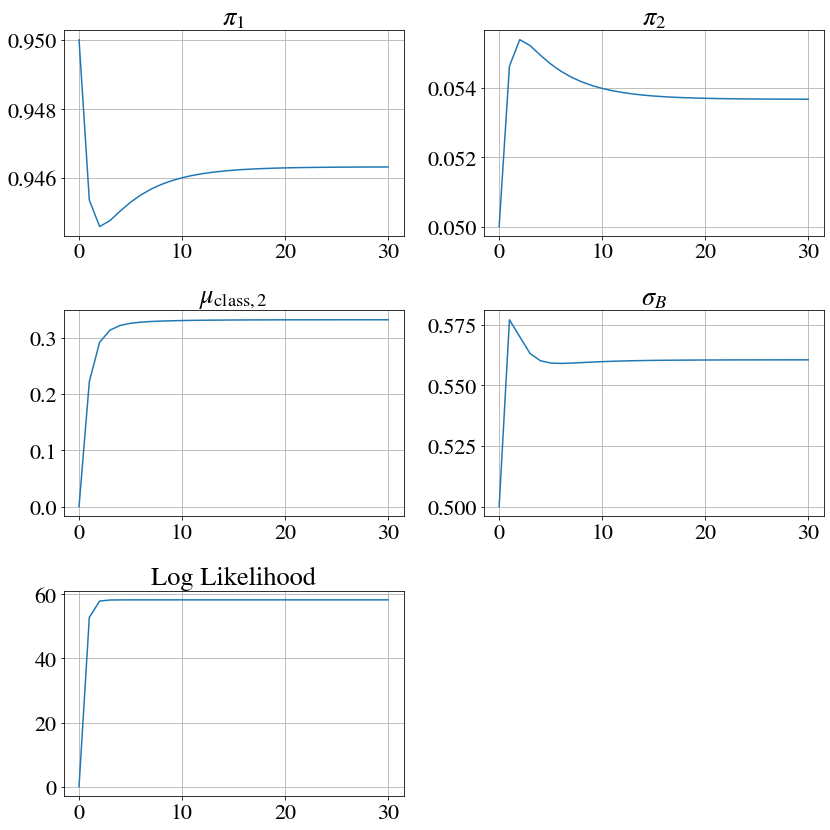

In [177]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(12,12))
ax1.plot(parameters[:,0])
ax1.grid()
ax1.set_title("$\\pi_1$")
ax2.plot(parameters[:,1])
ax2.grid()
ax2.set_title("$\\pi_2$")
ax3.plot(parameters[:,3])
ax3.grid()
ax3.set_title("$\\mu_{\mathrm{class}, 2}$")
ax4.plot(parameters[:,4])
ax4.grid()
ax4.set_title("$\\sigma_B$")

ax5.plot(likelihood_trace)
ax5.grid()
ax5.set_title("Log Likelihood")

ax6.set_visible(False)
fig.tight_layout()
plt.show()



In [178]:
print("""π_1 = """, parameters[-1,0])
print("""π_2 = """, parameters[-1,1])
print("""N_1 = """, (parameters[-1,0]*len(z_data))//1 + 1)
print("""N_2 = """, (parameters[-1,1]*len(z_data))//1)

print('\n')

print("last 20 gamma_2 values")
print(calc_gammas(parameters[-1,:], z_data, mu_data, mu_err_data)[1][-20:])
print("We see that the last 12 values (the outliers) are ~10 times greater than the rest of the gamma_2 values")

π_1 =  0.9463177068368928
π_2 =  0.05368229316310714
N_1 =  561.0
N_2 =  31.0


last 20 gamma_2 values
[0.03551856 0.02574597 0.04270048 0.02335978 0.02264715 0.01840311
 0.08420934 0.02940262 0.95536441 0.89555883 0.99506576 0.9943312
 0.99999999 1.         0.99977261 0.52156078 0.21081703 0.91142601
 0.92473601 0.6830577 ]
We see that the last 12 values (the outliers) are ~10 times greater than the rest of the gamma_2 values


***

#### Problem 2 - Back to Quasar

In HW3, we performed Principal Component Analysis (PCA) on the quasar (QSO) spectra from the Sloan Digital Sky Survey (SDSS); we filtered for high $S/N$ to apply the standard PCA and selected 18 high-$S/N$ spectra of QSOs with redshift 2.0 < z < 2.1, trimmed to $1340 < \lambda < 1620\ \mathring{A}$. Then, using the first three principal eigenvectors from the covariance matrix, we reconstructed each of the 18 QSO spectra.
<br><br>
In this assignment, we do Expectation Maximization PCA with and without per-observation weights. We use a simple noise fit of PCA components to individual spectra. Finally, using a Gaussian process, we compute the posterior distribution of the QSO's true emission spectrum and sample from it. 
<br><br>
The following analysis is based on https://arxiv.org/pdf/1208.4122.pdf, and https://arxiv.org/pdf/1605.04460.pdf
<br><br>

In [120]:
# Load data
wavelength = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW6/HW5_Problem2_wavelength.txt")
X = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW6/HW5_Problem2_QSOspectra.txt")
ivar = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW6/HW5_Problem2_ivar_flux.txt")

In [121]:
# Data dimension
print( np.shape(wavelength) )
print( np.shape(X) )
print( np.shape(ivar) )

(824,)
(18, 824)
(18, 824)


In the above cell, we load the following data: wavelength in Angstroms ("wavelength"), a 2D array of spectra x fluxes ("$X$"), and another 2D array of inverse variances ($1/\sigma^2$) of the flux array ("ivar").
<br><br>
We have 824 wavelength bins, so "$X$" is a 18 $\times$ 824 matrix, each row containing fluxes of different QSO spectra and each column containing fluxes in different wavelength bins. (e.g. X[i,j] is the measured flux of QSO $i$ in wavelength bin $j$.) Similarly, "ivar" is a 18 $\times$ 824 matrix. (e.g. ivar[i,j] is the inverse variance of the flux of QSO $i$ in wavelength bin $j$.)
<br><br>
Remember that in HW3, we computed the eigenvectors of the covariance of the quasars, sorted by their descending eigenvalues; we call them the principal components (henceforth denoted by $\phi$). Suppose that we have $k$ eigenvectors, each of length 824. Construct the matrix of eigenvectors $\phi = [\phi_1\ \phi_2\ ...\ \phi_k]$, with $\phi_i$ the $i$th principal eigenvector.<br><br>
We can reconstruct the data as:<br><br>
$$ \hat{X} = \mu + \sum_k c_k \phi_k  $$
<br>
where $\mu$ is the mean of the initial dataset and $c_k$ is the reconstruction coefficient for eigenvector $\phi_k$.
<br><br>
More specifically, we define $\mu$ as:
<br><br>
$ \mu$ $ =
    \begin{bmatrix}
        \overline{x}_1 & \overline{x}_2 & \dots  &  \overline{x}_{824} \\
    \end{bmatrix} $
<br><br>
The mean-centered data matrix $X_c$ can be defined as:
<br><br>
$X_c = X - \mu$ $ =
    \begin{bmatrix}
        x_{(1,1)} - \overline{x}_1 & x_{(1,2)} - \overline{x}_2 & \dots  & x_{(1,824)} - \overline{x}_{824} \\
        x_{(2,1)} - \overline{x}_1 & x_{(2,2)} - \overline{x}_2 & \dots  & x_{(2,824)} - \overline{x}_{824} \\
        \vdots & \vdots & \vdots & \vdots \\
        x_{(18,1)} - \overline{x}_1 & x_{(18,2)} - \overline{x}_2 & \dots  & x_{(18,824)} - \overline{x}_{824}
    \end{bmatrix}$
<br><br>
where $x_{m,n}$ denote the flux of $m$th QSO in $n$th wavelength bin, and $\overline{x}_k$ is the mean flux in $k$th wavelength bin.
<br><br>
$ \mu$ $ =
    \begin{bmatrix}
        \overline{x}_1 & \overline{x}_2 & \dots  &  \overline{x}_{824} \\
    \end{bmatrix}$
<br><br>
<span style="color:blue"> <i> 1. Plot $\mu$ as a function of wavelength $\lambda$.  </i></span> <br>

In [122]:
#compute X_c
X_c = np.empty(np.shape(X))
mu = np.empty(len(X[0,:]))
for i in range(len(X[0,:])):
  mean_i = np.mean(X[:,i])
  mu[i] = mean_i
  X_c[:,i] = X[:,i] - mean_i

#compute covariance matrix
C = (1 / (len(X[:,0]) - 1)) * np.dot(X_c.transpose(), X_c)

#compute φ matrix
from numpy.linalg import eig
eigvals, eigvecs = eig(C)

indeces = np.argsort(eigvals)[::-1]
sorted_eigvals = eigvals[indeces]
sorted_eigvecs = eigvecs[:,indeces]

phi = sorted_eigvecs

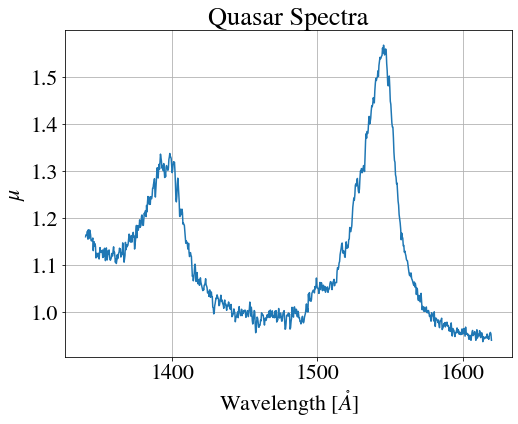

In [124]:
plt.figure(figsize=(8,6))
plt.ylabel("$\\mu$")
plt.xlabel("Wavelength [$\\mathring{A}$]")
plt.title("Quasar Spectra")
plt.plot(wavelength,mu)
plt.grid()
plt.show()

<br><br>
"Expectation Maximization (EM) is an iterative technique for solving parameters to maximize a likelihood function for models with unknown hidden (or latent) variables. Each iteration involves two steps: finding the expectation value of the hidden variables given the current model (E-step), and then modifying the model parameters to maximize the fit likelihood given the estimates of the hidden variables (M-step)." (https://arxiv.org/pdf/1208.4122.pdf)
<br><br>
Now, do Expectation Maximization PCA. In this case, we wish to solve for the eigenvectors, and the latent variables are the coefficients $c$. The likelihood is "the ability of the eigenvectors to describe the data."
<br><br>
First, find the eigenvector $\phi_1$ with the highest eigenvalue (the first principal eigenvector):
<br><br>
1. Initialize: Let $\phi$ is a random vector of length 824.
<br><br>
2. <b>E-step</b>: For each QSO $j$, $$c_j = X_{row\ j} \cdot \phi$$ <br> Here, "$\cdot$" represents a dot product, so $X_{row\ j}$ and $\phi$ are vectors of length 824, so $c_j$ is a number. $c = [c_1\ c_2\ ...\ c_{18}]$ is a vector of length 18 (because we have 18 QSOs in this problem). So for each QSO $j$, we solve the coefficient $c_j$ which best fits that QSO using $\phi$.
<br><br>
3. <b>M-step</b>: $$\phi = \frac{\sum_j c_j\ X_{row\ j}}{\sum_j c_j^2} $$
<br>
Using the coefficients $c_j$, we update $\phi$ to find the vector which best fits the data given $c_j$.
<br><br>
4. Normalize: 
$$ \phi = \frac{\phi}{|\phi|} $$
<br><br>
5. Iterate until converged. Once converged, $c_1 = c$, and $\phi_1 = \phi$
<br><br>


After you get $\phi_1$, subtract the projection of $\phi$ from $X$ ($X - c_1 \otimes \phi_1$, where "$\otimes$" is the outer product (https://en.wikipedia.org/wiki/Outer_product). $c_1$ is a vector of length 18, and $\phi_1$ is a vector of length 824, so $c_1 \otimes \phi_1$ is a $18 \times 824$ matrix.) and repeat the EM algorithm.
<br><br>
(So to find $\phi_2$, you should use a data matrix $X - c \otimes \phi_1$. To find $\phi_2$, use $X - c_1 \otimes \phi_1 - c_2 \otimes \phi_2$), and so on.
<br><br>
<span style="color:blue"> <i> 2. Using EM PCA, find the first three principal eigenvectors $\phi_1, \phi_2, \phi_3$ and plot them as a function of wavelength.  </i></span> <br>

In [125]:
#Initialization Step
X_data = X
total_phis = []
total_cs = []
for i in range(3):
  phi = np.random.random(size=(824))
  N_iterations = 100
  for i in range(N_iterations):
    # phi_trace[i, :] = phi
    #E Step
    Cs = [np.dot(X_data[j,:], phi) for j in range(18)]
    # C_trace[i, :] = Cs

    #M Step
    phi = np.array([(Cs[j] * X_data[j,:])/Cs[j]**2  for j in range(18)])
    phi = np.sum(phi, axis=0)

    #Normalize
    phi = phi/np.sqrt(np.dot(phi,phi))
    
  c_i = Cs
  phi_i = phi
  total_cs.append(c_i)
  total_phis.append(phi_i)
  X_data = X_data - np.outer(c_i, phi_i)

total_phis = np.array(total_phis)
total_cs = np.array(total_cs)

In [126]:
np.shape(total_phis)

(3, 824)

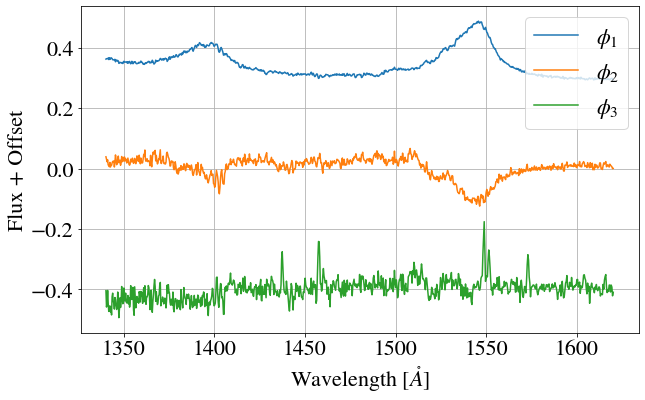

In [127]:
plt.figure(figsize=(10,6))
plt.plot(wavelength, total_phis[0,:]*10, label="$\\phi_1$")
plt.plot(wavelength,total_phis[1,:], label="$\\phi_2$")
plt.plot(wavelength,total_phis[2,:]- 0.4, label="$\\phi_3$")
plt.legend()
plt.grid()
plt.xlabel("Wavelength [$\\mathring{A}$]")
plt.ylabel("Flux + Offset")

plt.show()

Finally, reconstruct the data using the first principal eigenvectors:
<br><br>
$$ \hat{X} = \sum_{k = 1}^3 c_k \otimes \phi_k $$
<br>
<span style="color:blue"> <i> 3. For any one QSO spectra, plot the original and reconstructed spectra, using the above equation. </i></span> <br>

In [128]:
X_hat = np.zeros(np.shape(X))
for k in range(3):
  X_hat += np.outer(total_cs[k,:], total_phis[k,:])


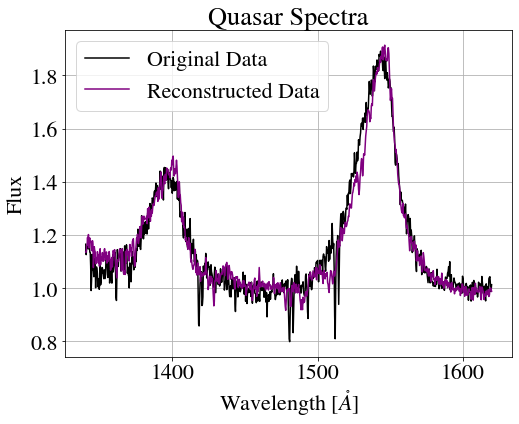

In [129]:
plt.figure(figsize=(8,6))
plt.ylabel("Flux")
plt.xlabel("Wavelength [$\\mathring{A}$]")
plt.title("Quasar Spectra")
plt.plot(wavelength,X[0,:],'k-', label='Original Data')
plt.plot(wavelength,X_hat[0,:], color='purple',linestyle='-', label='Reconstructed Data')
plt.legend()
plt.grid()
plt.show()

Alternatively, you can also reconstruct the data using "PC scores." (Call the PC score matrix $Z$) 
<br><br>
$$ Z = X_c \phi $$
<br><br>
Then, we can reconstruct the data by mapping it back to 824 dimensions with $\bf \phi^T$:
<br><br>
$$ \hat{X} = \mu + Z \phi^T $$
<br>
<span style="color:blue"> <i> 4. For any one QSO spectra, plot the original and reconstructed spectra, using PC scores. </i></span> <br>

In [130]:
Z = np.dot(X_c, total_phis.T)
X_hat_PC = mu +np.dot(Z, total_phis)

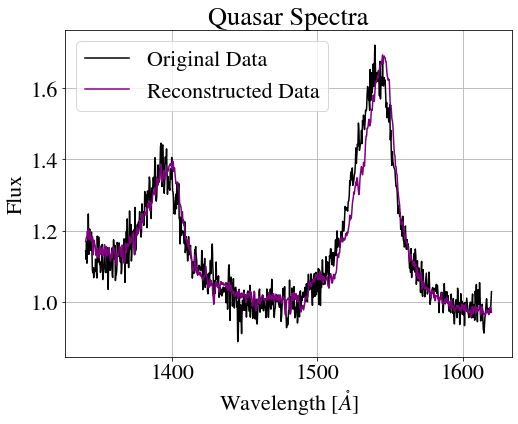

In [131]:
plt.figure(figsize=(8,6))
plt.ylabel("Flux")
plt.xlabel("Wavelength [$\\mathring{A}$]")
plt.title("Quasar Spectra")
plt.plot(wavelength,X[1,:],'k-', label='Original Data')
plt.plot(wavelength,X_hat_PC[1,:], color='purple',linestyle='-', label='Reconstructed Data')
plt.legend()
plt.grid()
plt.show()


Now, include noisier QSO spectra.

In [132]:
# Load data
wavelength = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW6/HW5_Problem2_wavelength_300.txt")
X = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW6/HW5_Problem2_QSOspectra_300.txt")
ivar = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW6/HW5_Problem2_ivar_flux_300.txt")

In [133]:
ivar[ivar==0] = 1.e-4

In [134]:
# Data dimension
print( np.shape(wavelength) )
print( np.shape(X) )
print( np.shape(ivar) )

(824,)
(2562, 824)
(2562, 824)


We now have 2562 quasars (including 18 high $S/N$ quasars we had before). The below cell plots the spectra of two quasars; you can see how noisy they are.

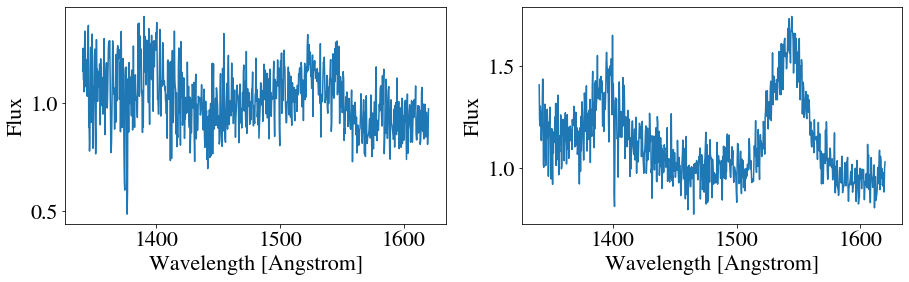

In [135]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
ax = axes[0]; i = 50
ax.plot(wavelength, X[i,:])
ax.set_xlabel('Wavelength [Angstrom]'); ax.set_ylabel('Flux')

ax = axes[1]; i = 500
plt.plot(wavelength, X[i,:])
ax.set_xlabel('Wavelength [Angstrom]'); ax.set_ylabel('Flux')
plt.show()

<br><br>
Now, perform EM PCA on 2562 quasars. 
<br><br>
<span style="color:blue"> <i> 5. Using EM PCA, find the first 10 principal eigenvectors $\phi_1, \phi_2, ..., \phi_{10}$ and reconstruct the data using them. ($ \hat{X} = \sum_{k = 1}^{10} c_k \otimes \phi_k $) For any two spectra, plot the original and reconstructed spectra. </i></span> <br>


In [136]:
#Initialization Step
X_data = X
total_phis = []
total_cs = []
N_QSO = len(X[:,0])
for i in range(10):
  phi = np.random.random(size=(824))
  N_iterations = 50
  for i in range(N_iterations):
    #E Step
    Cs = [np.dot(X_data[j,:], phi) for j in range(N_QSO)]

    #M Step
    phi = np.array([(Cs[j] * X_data[j,:])/Cs[j]**2  for j in range(N_QSO)])
    phi = np.sum(phi, axis=0)

    #Normalize
    phi = phi/np.sqrt(np.dot(phi,phi))
    
  c_i = Cs
  phi_i = phi
  total_cs.append(c_i)
  total_phis.append(phi_i)
  X_data = X_data - np.outer(c_i, phi_i)

total_phis = np.array(total_phis)
total_cs = np.array(total_cs)

In [137]:
X_hat = np.zeros(np.shape(X))
for k in range(10):
  X_hat += np.outer(total_cs[k,:], total_phis[k,:])

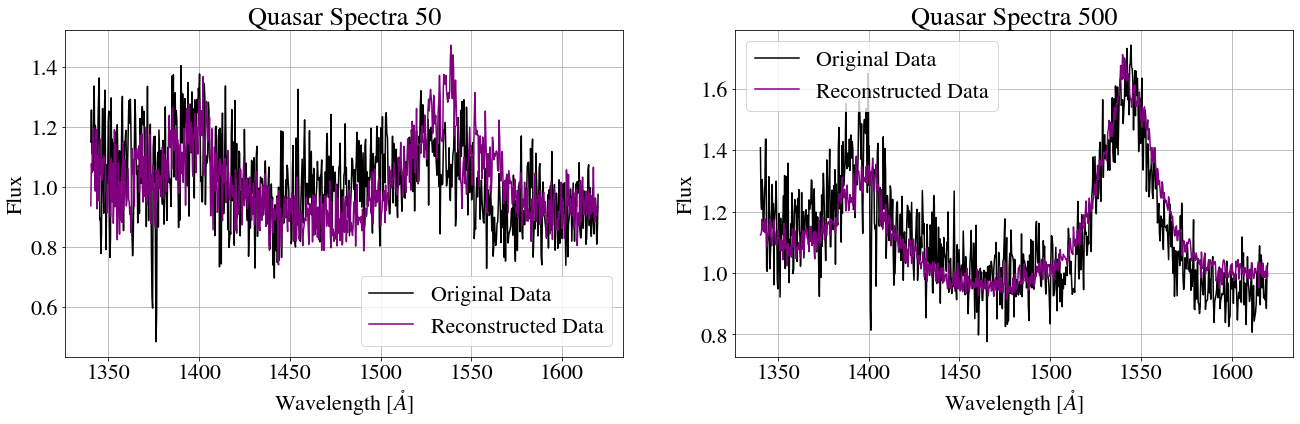

In [138]:
fig, (plt1, plt2) = plt.subplots(1,2,figsize=(22,6))
plt1.set_ylabel("Flux")
plt1.set_xlabel("Wavelength [$\\mathring{A}$]")
plt1.set_title("Quasar Spectra 50")
plt1.plot(wavelength,X[50,:],'k-', label='Original Data')
plt1.plot(wavelength,X_hat[50,:], color='purple',linestyle='-', label='Reconstructed Data')
plt1.legend()
plt1.grid()


plt2.set_ylabel("Flux")
plt2.set_xlabel("Wavelength [$\\mathring{A}$]")
plt2.set_title("Quasar Spectra 500")
plt2.plot(wavelength,X[500,:],'k-', label='Original Data')
plt2.plot(wavelength,X_hat[500,:], color='purple',linestyle='-', label='Reconstructed Data')
plt2.legend()
plt2.grid()
plt.show()

<br>
So far we treated all data equally when solving for the eigenvectors. However, we find that some data have considerably larger measurement noise, and they can unduly influence the solution. Now, we perform EM PCA with per-observation weights (called weighted EMPCA) so that the high $S/N$ data receive greater weight. (See https://arxiv.org/pdf/1208.4122.pdf for more detailed explanation. The following description is paraphrased from this paper.)
<br><br>
Basically, we add weights $w$ to the measured data in M-step: $\phi = \sum_j w_j\ c_j\ X_{row\ j}$
<br><br>
In this case, the situation is more complicated since the measured flux in each wavelength bin for each quasar has a different weight. So we cannot do a simple dot product to derive $c$; instead, we must solve a set of linear equations for $c$. Similarly, M-step must solve a set of linear equations to update $\phi$ instead of just performing a simple sum. Hence, the weighted EMPCA starts with a set of random orthonormal vectors and iterates over.
<br><br>
1. Initialize: Let $\phi$ is a set of random orthonormal vectors.

In [139]:
# Create an aray of random orthonormal vectors
# Reference: https://github.com/sbailey/empca
def _random_orthonormal(nvec, nvar, seed=1):
    """
    Return array of random orthonormal vectors A[nvec, nvar] 
    Doesn't protect against rare duplicate vectors leading to 0s
    """

    if seed is not None:
        np.random.seed(seed)
        
    A = np.random.normal(size=(nvec, nvar))
    for i in range(nvec):
        A[i] /= np.linalg.norm(A[i])

    for i in range(1, nvec):
        for j in range(0, i):
            A[i] -= np.dot(A[j], A[i]) * A[j]
            A[i] /= np.linalg.norm(A[i])

    return A

# Number of quasars
nQSO = len(X)
# Number of wavelength bins
nLambda = len(wavelength)
# Number of eigenvectors we want
nEigvec = 10

# A set of random orthonormal vectors
phi = _random_orthonormal(nLambda, nEigvec, seed=1)

2. <b>E-step</b>: $X_{row\ j} = \phi\ c_{col\ j}$. ($X_{row\ j}$ refers to $j$th row of $X$, and $c_{col\ j}$ is $j$th column of $c$. Note that $X$ is a matrix of dimension "nQSO" x "nLambda", $\phi$ is a matrix of dimension "nLambda" x "nEigvec", and $c$ is a matrix of dimension "nEigvec" x "nQSO".) Solve for $c$ assuming weights $w$.
<br><br>
We define weight $w$ as the inverse variance ("ivar"). (So $w$ is a matrix of dimension "nQSO" x "nLambda") This makes sense. "We weight the measured data by the estimated measurement variance so that noisy observations do not unduly affect the solution, while allowing PCA to describe the remaining signal variance."
<br><br>
Now, solve $X_{row\ j} = \phi\ c_{col\ j}$ for $c_{col\ j}$ with weights $w_{row\ j}$. More generally, let $A = \phi, x = c_{col\ j}, b = X_{row\ j}, w = w_{row\ j}$:
<br><br>
$$ b = Ax $$<br>
$$ wb = wAx$$<br>
$$ A^T wb = (A^T w A)x$$<br>
$$ (A^T w A)^{-1}A^T wb = x$$<br>
<br><br>
Hence, we get:<br><br>
$$ c_{col\ j} = (\phi^T w_{row\ j}\ \phi)^{-1}\ \phi^T w_{row\ j}\ X_{row\ j} $$
<br><br>
In the below cell, we define the function "_solve." <br> _solve(A, b, w) solves $Ax = b$ with weights $w$. This function solves $Ax = b$ with weights $w$ using $x = (A^T w A)^{-1}A^T wb$

In [140]:
# Solve Ax = b with weights w using the above set of equations
# Reference: https://github.com/sbailey/empca
import scipy
def _solve(A, b, w):
    """
    Solve Ax = b with weights w; return x
    
    A : 2D array
    b : 1D array length A.shape[0]
    w : 1D array same length as b
    """
  
    #- Apply weights
    # nvar = len(w)
    # W = dia_matrix((w, 0), shape=(nvar, nvar))
    # bx = A.T.dot( W.dot(b) )
    # Ax = A.T.dot( W.dot(A) )
    
    b = A.T.dot( w*b )
    A = A.T.dot( (A.T * w).T )
    if isinstance(A, scipy.sparse.spmatrix):
        x = scipy.sparse.linalg.spsolve(A, b)
    else:
        x = np.linalg.lstsq(A, b)[0]
        
    return x

Now, in the E-step, for each QSO $j$, we can solve $X_{row\ j} = \phi c_{col\ j}$ for $c_{col\ j}$ with weights $w_{row\ j}$ using the function "_solve".
<br><br>
Similarly in the M-step, for each wavelength bin $j$, we can solve $X_{col\ j} = c^T \phi_{row\ j}$ for $\phi_{row\ j}$ with weights $w_{col\ j}$ using the function "_solve".
<br><br>
<span style="color:blue"> <i> 6. The below cell uses the weighted EMPCA to find $\phi$. Fill in the blank and run the weighted EMPCA. </i></span> <br>

In [141]:
print(np.shape(phi))

(824, 10)


In [142]:
C = np.zeros( (nEigvec, nQSO) )

W = ivar

# Number of iteration for EMPCA
niteration = 20

for jj in range(niteration):
    print("iteration", jj+1, "/20")
    
    # E-step
    for i in range(nQSO):
        b = X[i,:]
        A = phi  
        w = W[i,:]           
        C[:,i] = _solve(A, b, w) 

    # M-step
    for j in range(nLambda):
        b = X[:,j]
        A = C.T
        w = W[:,j]
        phi[j,:] = _solve(A, b, w)
        
        

iteration 1 /20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


iteration 2 /20
iteration 3 /20
iteration 4 /20
iteration 5 /20
iteration 6 /20
iteration 7 /20
iteration 8 /20
iteration 9 /20
iteration 10 /20
iteration 11 /20
iteration 12 /20
iteration 13 /20
iteration 14 /20
iteration 15 /20
iteration 16 /20
iteration 17 /20
iteration 18 /20
iteration 19 /20
iteration 20 /20


<br><br>
Reconstruct the data using $\phi$:<br><br>
$$ \hat{X} = (\phi c)^T $$
<br><br>
$\phi$ is a matrix of dimension "nLambda" x "nEigvec", and $c$ is a matrix of dimension "nEigvec" x "nQSO". So $\hat{X}$ is a matrix of dimension "nQSO" x "nLambda" as expected.
<br><br>
<span style="color:blue"> <i> 7. Reconstruct the data using the above equation. Remember that you chose two spectra in Part 5. For the same two spectra, plot the original and reconstructed spectra. Part 5 uses EMPCA without weights. Compared to Part 5, does your reconstructed spectra become less noisy?    </i></span> <br>

In [143]:
X_hat_2 = np.dot(phi, C).T

print(np.shape(X_hat_2))

(2562, 824)


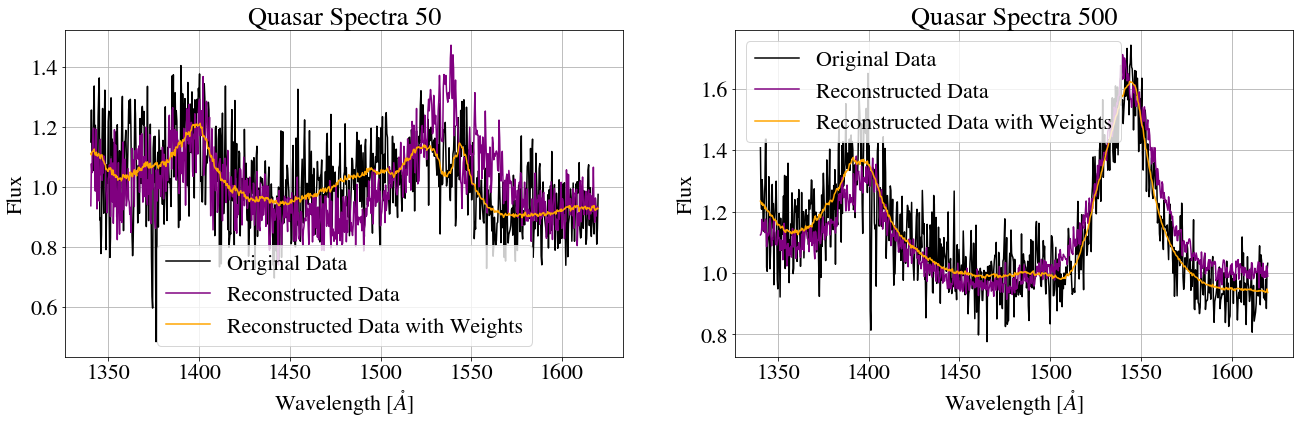

In [144]:
fig, (plt1, plt2) = plt.subplots(1,2,figsize=(22,6))
plt1.set_ylabel("Flux")
plt1.set_xlabel("Wavelength [$\\mathring{A}$]")
plt1.set_title("Quasar Spectra 50")
plt1.plot(wavelength,X[50,:],'k-', label='Original Data')
plt1.plot(wavelength,X_hat[50,:], color='purple',linestyle='-', label='Reconstructed Data')
plt1.plot(wavelength,X_hat_2[50,:], color='orange',linestyle='-', label='Reconstructed Data with Weights')
plt1.legend()
plt1.grid()


plt2.set_ylabel("Flux")
plt2.set_xlabel("Wavelength [$\\mathring{A}$]")
plt2.set_title("Quasar Spectra 500")
plt2.plot(wavelength,X[500,:],'k-', label='Original Data')
plt2.plot(wavelength,X_hat[500,:], color='purple',linestyle='-', label='Reconstructed Data')
plt2.plot(wavelength,X_hat_2[500,:], color='orange',linestyle='-', label='Reconstructed Data with Weights')
plt2.legend()
plt2.grid()
plt.show()

Yes we see a significant reduction in the noise!

***